Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Data processing:

In [2]:
#Load data from a CSV file into a DataFrame using the full file path in Python
gold_dataset = pd.read_csv('DATA PATH')


In [3]:
gold_dataset.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


1. Date – The specific time point of each data entry.
2. SPX – S&P 500 Index, reflecting overall stock market    performance.
3. GLD – Price of the SPDR Gold Shares ETF, which tracks gold prices.
4. USO – Price of the United States Oil Fund, representing oil market trends.
5. SLV – Price of the iShares Silver Trust, tracking silver prices.
6. EUR/USD – Exchange rate between the euro and U.S. dollar, indicating currency fluctuations.

In [4]:
# Convert the 'Date' column to datetime
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'], format='%m/%d/%Y')

In [5]:
#Shape of the data
gold_dataset.shape
print('Number of raws:', gold_dataset.shape[0])
print('Number of columns:', gold_dataset.shape[1])

Number of raws: 2290
Number of columns: 6


In [6]:
#Key details regarding data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [7]:
#Missing data verification
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Data measurement
gold_dataset.iloc[:, 1:].describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Possitive Correlation
2. Negative Correlation

In [9]:
# Choosing only numerical column
numeric_data = gold_dataset.select_dtypes(include=[float, int])

# Correlation calculation
correlation = numeric_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


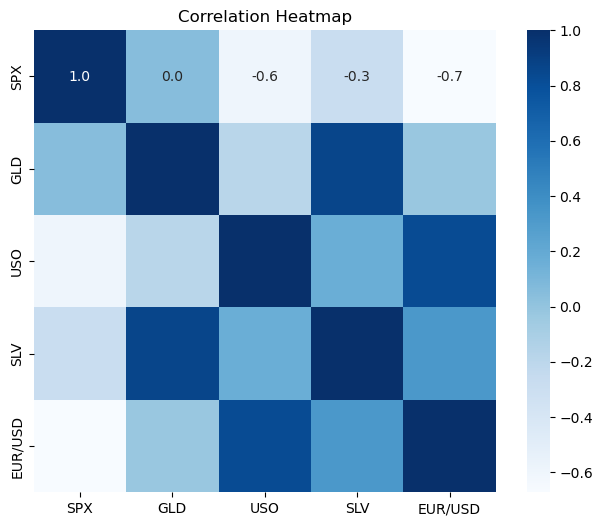

In [10]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Displaying the correlation values for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


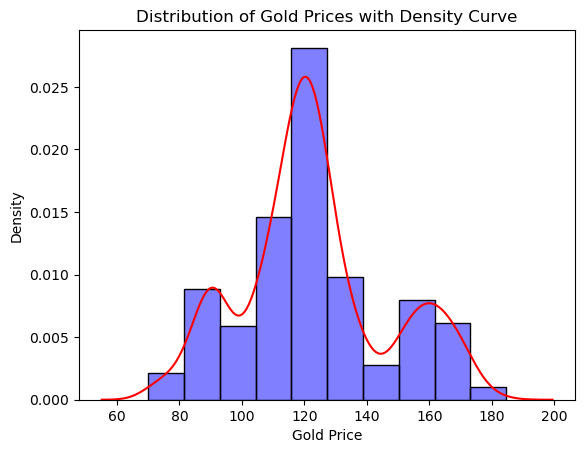

In [12]:
# Convert inf values to NaN
gold_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if necessary
gold_dataset.dropna(subset=['GLD'], inplace=True)

# Analyzing the distribution of gold prices

# Plot histogram of gold prices
sns.histplot(gold_dataset['GLD'], color='blue', kde=False, stat='density', alpha=0.5, bins=10)

# Overlay density curve on the histogram
sns.kdeplot(gold_dataset['GLD'], color='red')

# Add axis labels and title
plt.xlabel('Gold Price')
plt.ylabel('Density')
plt.title('Distribution of Gold Prices with Density Curve')

# Show the plot
plt.show()

In [13]:
# Select features and target
a = gold_dataset[['SPX', 'USO', 'SLV', 'EUR/USD']]# Features (excluding 'GLD')
b = gold_dataset['GLD']  # Target variable (gold prices)

# Print the target variable (output bariavle of dataset)
print("Target Variable (b):")
print(b)

# Print the features (input variable of dataset)
print("Features(a):")
print(a)

Target Variable (b):
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64
Features(a):
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting the features and target

Splitting data for training data and test data:

1. a_train: Features for the training set.
2. a_test: Features for the testing set.
3. b_train: Target variable for the training set.
4. b_test: Target variable for the testing set.

In [14]:
# Split data
a_train, a_test, b_train, b_test, dates_train, dates_test = train_test_split(
    a, b, gold_dataset['Date'], test_size=0.3, random_state=2
)

# Print the shapes of the resulting datasets for verification
print(f'a_train shape: {a_train.shape}')
print(f'a_test shape: {a_test.shape}')
print(f'b_train shape: {b_train.shape}')
print(f'b_test shape: {b_test.shape}')
print(f'dates_train shape: {dates_train.shape}')
print(f'dates_test shape: {dates_test.shape}')



a_train shape: (1603, 4)
a_test shape: (687, 4)
b_train shape: (1603,)
b_test shape: (687,)
dates_train shape: (1603,)
dates_test shape: (687,)


In [15]:
print(b_test)
print(b_train)


903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
1048    169.419998
2143    123.139999
1583    115.000000
141      85.459999
1719    110.750000
Name: GLD, Length: 687, dtype: float64
66       91.769997
2007    116.129997
934     164.399994
155      81.989998
1677    107.750000
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1603, dtype: float64


Model trainig - Random Forest Regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

regressor.fit(a_train, b_train) #training the model

RandomForestRegressor()

Model evaluation

In [17]:
test_data_prediction = regressor.predict(a_test)

In [18]:
#Create DataFrame
results_df = pd.DataFrame({
    'Date': dates_test,
    'Actual Value': b_test,
    'Predicted Value': test_data_prediction
})

# Convert 'Date' column to datetime if it's not already
results_df['Date'] = pd.to_datetime(results_df['Date'])

# Sort DataFrame by 'Date'
results_df = results_df.sort_values(by='Date')

# Reset index if desired
results_df = results_df.reset_index(drop=True)

# Display the sorted DataFrame (first 5 raws)
print(results_df.head(5))
print(results_df.head(-5))

        Date  Actual Value  Predicted Value
0 2008-01-04     85.129997        86.418201
1 2008-01-07     84.769997        86.442601
2 2008-01-08     86.779999        86.643199
3 2008-01-10     88.250000        87.538299
4 2008-01-11     88.580002        87.694599
          Date  Actual Value  Predicted Value
0   2008-01-04     85.129997        86.418201
1   2008-01-07     84.769997        86.442601
2   2008-01-08     86.779999        86.643199
3   2008-01-10     88.250000        87.538299
4   2008-01-11     88.580002        87.694599
..         ...           ...              ...
677 2018-03-16    124.599998       125.077601
678 2018-03-20    124.309998       122.089300
679 2018-03-22    125.980003       126.147201
680 2018-04-09    126.820000       126.560900
681 2018-04-11    128.110001       127.158300

[682 rows x 3 columns]


In [19]:
# R-squared error
error_score = metrics.r2_score(b_test, test_data_prediction)
print("R squared error: ", error_score)

# Model evaluation
mse = mean_squared_error(b_test, test_data_prediction)
print(f'Mean Squared Error: {mse}')

R squared error:  0.9897009322578251
Mean Squared Error: 5.254916632282135


In [20]:
#print results
print(results_df)

          Date  Actual Value  Predicted Value
0   2008-01-04     85.129997        86.418201
1   2008-01-07     84.769997        86.442601
2   2008-01-08     86.779999        86.643199
3   2008-01-10     88.250000        87.538299
4   2008-01-11     88.580002        87.694599
..         ...           ...              ...
682 2018-04-17    127.750000       127.448899
683 2018-04-25    125.410004       124.960600
684 2018-05-03    124.279999       124.366000
685 2018-05-08    124.589996       122.580400
686 2018-05-16    122.543800       122.211601

[687 rows x 3 columns]


Compare the Actual values and Predicted Values in a plot:

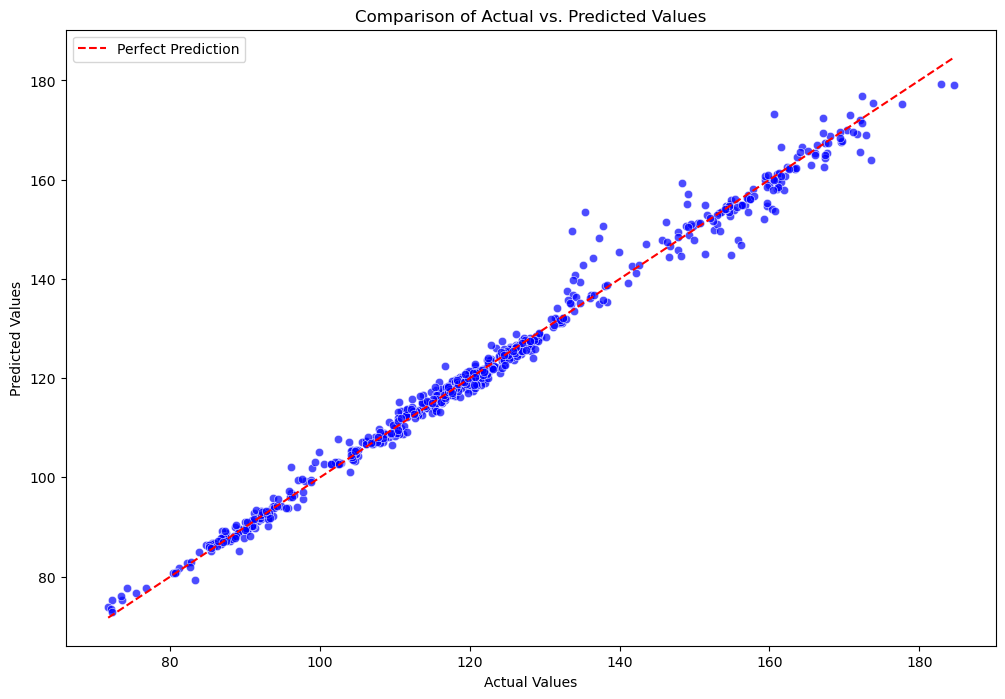

      Actual Values  Predicted Values
903      168.020004        168.807600
129       81.230003         81.809500
1787     112.320000        115.730700
1913     127.589996        127.355901
2048     119.620003        120.467202
...             ...               ...
1048     169.419998        168.351495
2143     123.139999        121.811700
1583     115.000000        114.916801
141       85.459999         85.808500
1719     110.750000        111.966501

[687 rows x 2 columns]


In [28]:
# Create DataFrame for plotting
comparison_df = pd.DataFrame({
    'Actual Values': b_test,
    'Predicted Values': test_data_prediction
})

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual Values', y='Predicted Values', data=comparison_df, color='blue', alpha=0.7)

# Add a line for perfect predictions
plt.plot([min(b_test), max(b_test)], [min(b_test), max(b_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

print(comparison_df)


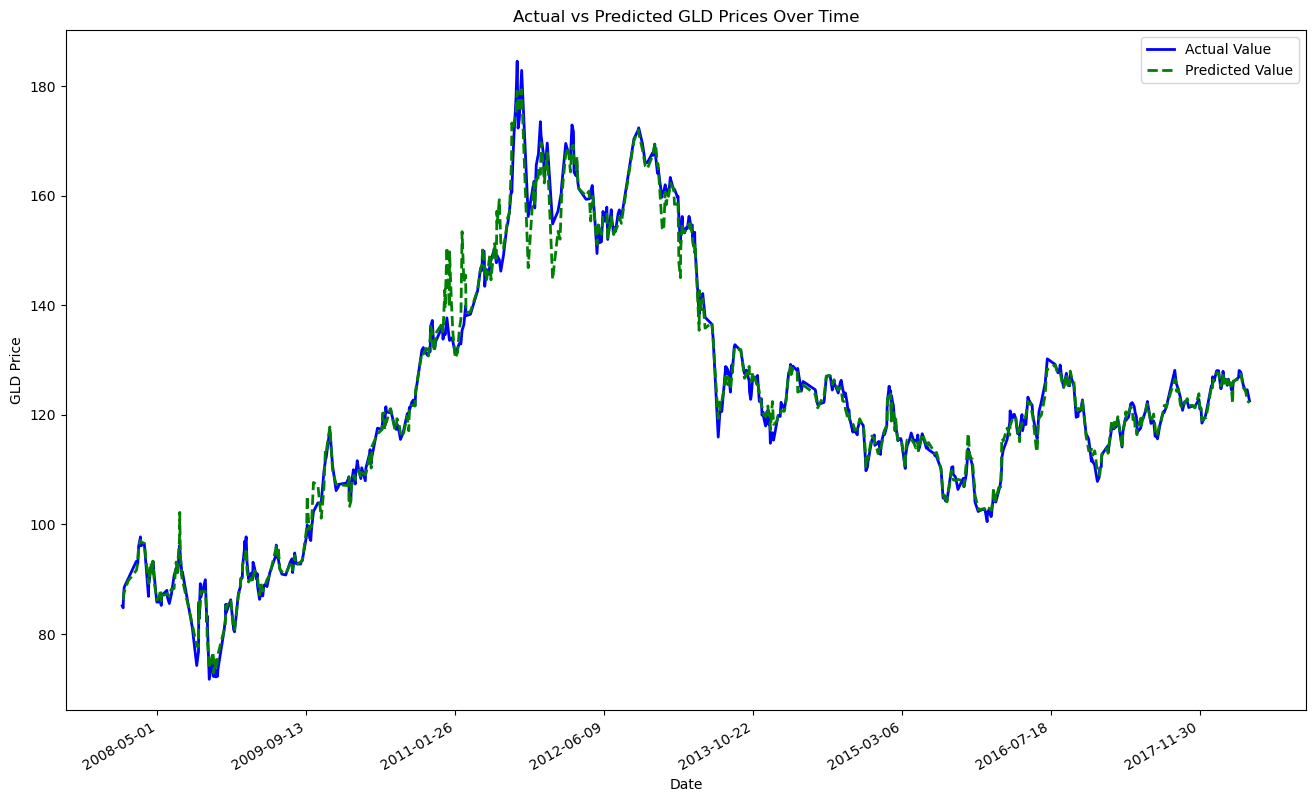

In [23]:
# Create the plot
plt.figure(figsize=(16, 10))

# Plot Actual Values
plt.plot(results_df['Date'], results_df['Actual Value'], color='blue', label='Actual Value', linewidth=2)

# Plot Predicted Values
plt.plot(results_df['Date'], results_df['Predicted Value'], color='green', label='Predicted Value', linestyle='--', linewidth=2)

# Add titles and labels
plt.title('Actual vs Predicted GLD Prices Over Time')
plt.xlabel('Date')
plt.ylabel('GLD Price')

# Rotate and format dates on x-axis for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit number of date ticks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Date format
plt.gcf().autofmt_xdate()  # Rotate dates

# Add a legend
plt.legend()

# Show the plot
plt.show()
